# ViewBovis-stats

This repo provides code to visualise basic traffic and requests stats on APHA's [ViewBovis](#https://github.com/aphascience/ViewBovis) web-app.

## Installation

* Requires at least python3, is tested on python3.10.
* Recommend using a python virtual environment.
* To install dependencies: `pip install -r requirements.txt`

## Running

1. Ensure that all stats files for each day you wish to visualise are downloaded to a single local directory. These files are `.json` format and saved on the ViewBovis server at `/var/log/viewbovis/` with a naming convention like: `viewbovis_requests_yyyy-mm-dd.json`, you will need to copy these to your dev machine.
1. In `visualise.ipynb`, update the variables `stats_dir`, `start_date` and `end_date` below to the location of where you have the stats, the start and end dates you wish to plot from and to respectively. Leaving `start_date` and `end_date` as `None` will plot the all dates that you have downloaded.

In [4]:
# set these values
stats_dir = "/home/nickpestell/tmp/viewbovis_stats/"
start_date = None
end_date = None

3. To run the jupyter notebook:
```
jupyter nbconvert --execute visualise.ipynb --to markdown --output <your-outfile-name>
```
This will create a markdown that looks much the same as this `readme.md`

## Output

This outputs a bar chart as seen below showing frequency of visits to ViewBovis and its associated API requests on a daily basis. 

There are five suplots:

1. "/" - homepage (i.e. the number of times the app was visited)
1. "/sample" - cattle movement requests
1. "/sample/related" - SNP distance map requests
1. "/sample/matrix" - SNP matrix requests
1. "/charon/getDataset" - Nextstrain searches

# Code

In [1]:
import utils

In [3]:
def bar_chart(df_stats, start_date=None, end_date=None):
    if start_date==None:
        start_date = df_stats.index[0]
    if end_date==None:
        end_date = df_stats.index[-1]
    return df_stats.loc[start_date:end_date].plot.bar(figsize=(16, 10), subplots=True, rot=80)

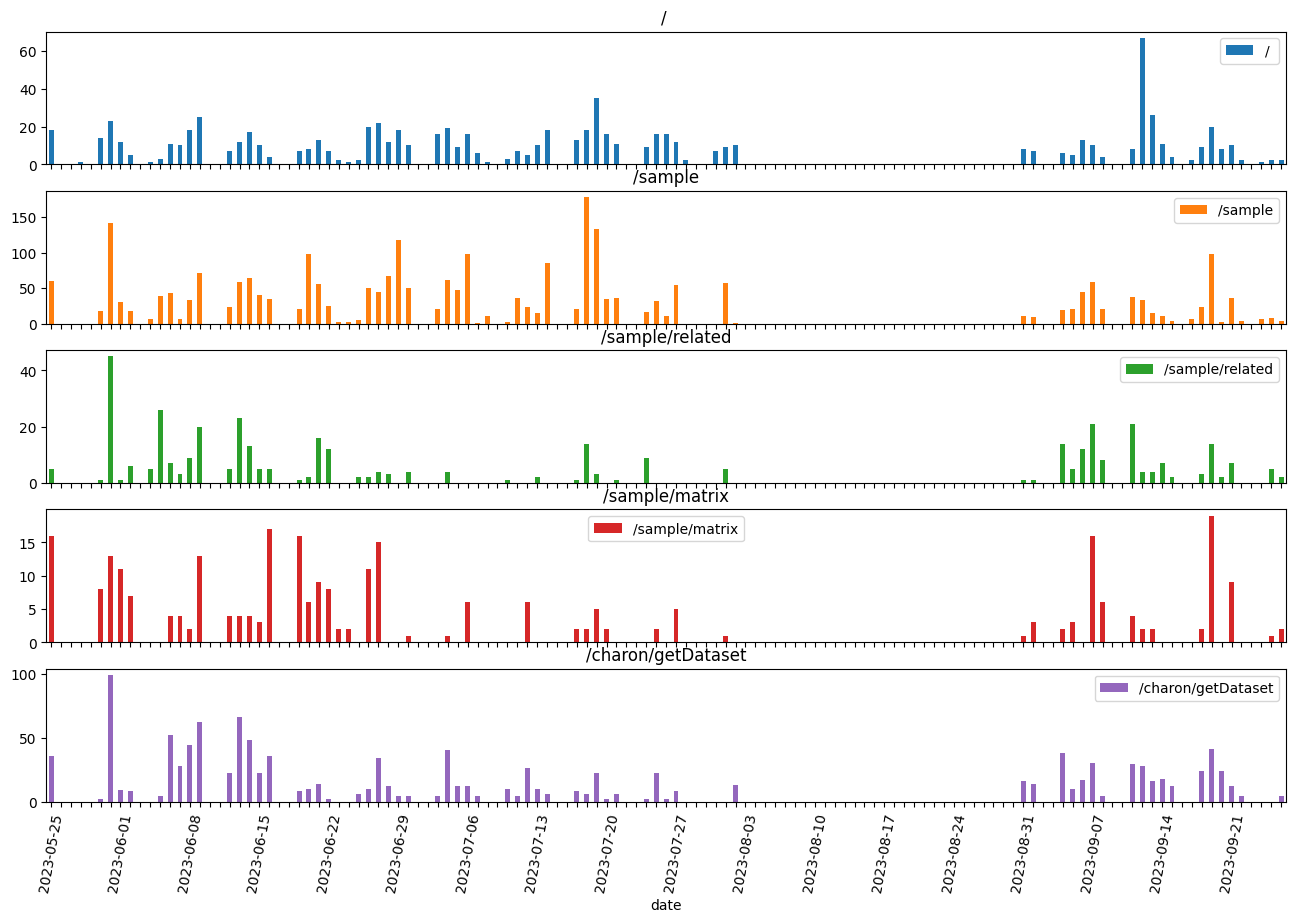

In [10]:
df_stats = utils.build_stats_df(stats_dir)
axs = bar_chart(df_stats)
for ax in axs:
    for i, t in enumerate(ax.get_xticklabels()):
        if (i % 7) != 0:
            t.set_visible(False)